### Análise de dados temporáis do Coronavirus

[worldometers com estatíticas sobre o coronavirus](https://www.worldometers.info/coronavirus/)

[link da origem do dados no github](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

Esta pasta contém tabelas de resumo de séries temporais diárias, incluindo confirmados, óbitos e recuperados. Todos os dados são lidos a partir do relatório diário do caso. As tabelas de séries temporais estão sujeitas a atualização caso sejam identificadas imprecisões em nossos dados históricos.

Duas tabelas de séries temporais são para os casos e mortes confirmados nos EUA, relatados no nível do condado. Eles são nomeados:
* time_series_covid19_confirmed_US.csv;
* time_series_covid19_deaths_US.csv.

Três tabelas de séries temporais são para os casos confirmados globais, casos recuperados e mortes. Austrália, Canadá e China são relatados em nível de província/estado. As dependências da Holanda, Reino Unido, França e Dinamarca estão listadas no nível de província/estado. Os EUA e outros países estão no nível de país. As tabelas são renomeadas como:
* time_series_covid19_confirmed_global.csv;
* time_series_covid19_deaths_global.csv;
* time_series_covid19_recovered_global.csv.

Frequência de atualização:
* Uma vez por dia por volta das 23:59 (UTC).

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

### Leitura dos dados do arquivo (time_series_covid19_confirmed_global.csv)
Casos confirmados de infecção global</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [2]:
df_confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,170152,170604,171246,171422,171519,171673,171857,171931,172205,172441
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,267551,268008,268304,268491,268940,269301,269601,269904,270164,270370
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,261226,261752,262165,262570,262994,263369,263685,263936,264054,264201
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,37140,37140,37277,37361,37452,37522,37589,37589,37589,37589
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98514,98514,98514,98555,98568,98585,98605,98617,98638,98658


In [3]:
df_confirmados.shape

(284, 766)

In [4]:
print(f'Quantidade de países presentes no arquivo - {df_confirmados["Country/Region"].count()}')


Quantidade de países presentes no arquivo - 284


In [68]:
print('Lista de países que compõe a base de dados:', end='\n\n')
_ = [print(f'{pais: <33}', end='') for pais in df_confirmados['Country/Region'].values]

Lista de países que compõe a base de dados:

Afghanistan                      Albania                          Algeria                          Andorra                          Angola                           Antarctica                       Antigua and Barbuda              Argentina                        Armenia                          Australia                        Australia                        Australia                        Australia                        Australia                        Australia                        Australia                        Australia                        Austria                          Azerbaijan                       Bahamas                          Bahrain                          Bangladesh                       Barbados                         Belarus                          Belgium                          Belize                           Benin                            Bhutan                           Bolivia                        

### Seleção de todas as datas presentes no dataframe

In [70]:
col_datas = df_confirmados.columns.tolist()[4:]
print(f'5 últimas data: {col_datas[-5:]}')

5 últimas data: ['2/17/22', '2/18/22', '2/19/22', '2/20/22', '2/21/22']


### Alguns países apresentam informações por Province/State	

In [7]:
filtro = df_confirmados['Country/Region'].value_counts() > 1
filtro[filtro.values]

China             True
Canada            True
United Kingdom    True
France            True
Australia         True
Netherlands       True
Denmark           True
New Zealand       True
Name: Country/Region, dtype: bool

### Sumarização para que seja apresentado totais por país

In [8]:
df_confirmados_by_country = df_confirmados[2:].groupby('Country/Region')[col_datas].sum()
df_confirmados_by_country.sample(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Dominica,0,0,0,0,0,0,0,0,0,0,...,10414,10414,10527,10669,10728,10752,10801,10801,10801,10801
Uganda,0,0,0,0,0,0,0,0,0,0,...,162639,162696,162822,162869,162932,162932,162973,163004,163032,163116
Mexico,0,0,0,0,0,0,0,0,0,0,...,5283852,5283852,5292706,5300537,5344840,5366405,5366405,5407711,5413425,5413425
North Macedonia,0,0,0,0,0,0,0,0,0,0,...,286096,287016,287481,288750,289797,290915,291820,292660,293328,293559
South Africa,0,0,0,0,0,0,0,0,0,0,...,3640162,3641811,3642905,3645269,3648968,3652024,3654824,3657091,3658547,3659698
Monaco,0,0,0,0,0,0,0,0,0,0,...,9020,9020,9020,9085,9111,9128,9162,9186,9188,9188
Cote d'Ivoire,0,0,0,0,0,0,0,0,0,0,...,81118,81118,81213,81237,81253,81282,81322,81346,81367,81374
Poland,0,0,0,0,0,0,0,0,0,0,...,5356647,5376674,5388907,5408754,5434424,5460552,5481938,5500728,5513075,5521766
Kuwait,0,0,0,0,0,0,0,0,0,0,...,599039,601307,603869,606035,607952,609453,610801,611820,613015,614344


### Gráfico apresentando a curva de casos confirmado no Brasil

In [9]:
quantidade_acumulada_atual = df_confirmados_by_country.loc['Brazil'][-1]
print(f'O número de casos acumulados até o momento é de - {quantidade_acumulada_atual}')

O número de casos acumulados até o momento é de - 28258458


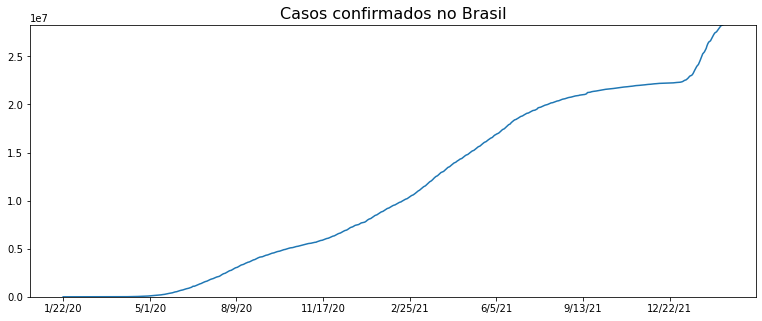

In [10]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil", fontsize=16)
df_confirmados_by_country.loc['Brazil'].plot()
plt.ylim(0, df_confirmados_by_country.loc['Brazil'][-1])
plt.show()

### Calculando a quantidade de casos confirmados por dia no Brasil
Calculando a diferença entre um dia e o dia anterior

In [11]:
minimo = min(df_confirmados_by_country.loc['Brazil'].diff().dropna())
print(f'Atenção a um possível erro na base de dados.')
print(f'Menor quantidade de casos confirmados em um dia - {minimo:.0f}')

Atenção a um possível erro na base de dados.
Menor quantidade de casos confirmados em um dia - -19796


In [12]:
maximo = max(df_confirmados_by_country.loc['Brazil'].diff().dropna())
print(f'Maior quantidade de casos confirmados em um dia - {maximo:.0f}')

Maior quantidade de casos confirmados em um dia - 287149


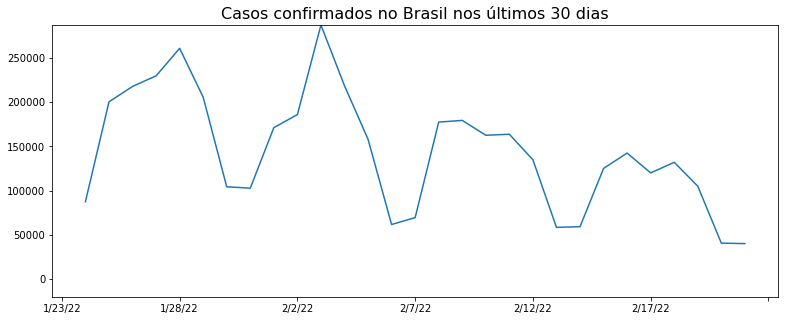

In [13]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil nos últimos 30 dias", fontsize=16)
plt.ylim(minimo, maximo)
df_confirmados_by_country.loc['Brazil'][-30:].diff().plot()
plt.show()

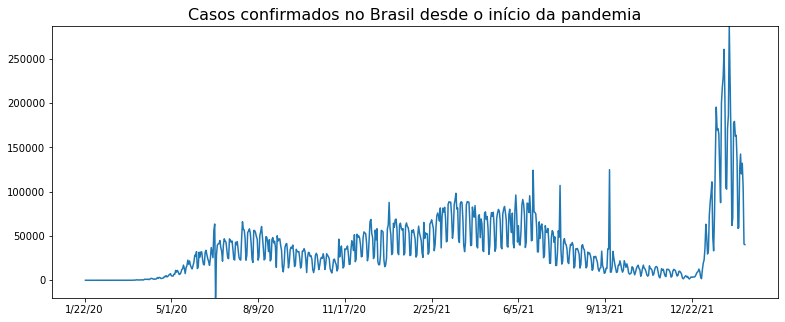

In [14]:
plt.figure(figsize=(13, 5))
plt.title("Casos confirmados no Brasil desde o início da pandemia", fontsize=16)
plt.ylim(minimo, maximo)
df_confirmados_by_country.loc['Brazil'].diff().plot()
plt.show()

### Comparativo entre todos os países até o momento

In [71]:
paises_maior_quantidade_casos_confirmados = df_confirmados_by_country[col_datas[-1]].sort_values(ascending=False)
paises_maior_quantidade_casos_confirmados[:30]

Country/Region
US                78529099
India             42851929
Brazil            28258458
France            22466076
United Kingdom    18785333
Russia            15297628
Germany           13805197
Turkey            13589511
Italy             12494459
Spain             10858000
Argentina          8838674
Iran               6961562
Netherlands        6207958
Colombia           6049952
Poland             5521766
Mexico             5413425
Indonesia          5197505
Ukraine            4959461
Japan              4542657
South Africa       3659698
Philippines        3653526
Israel             3566809
Czechia            3523869
Belgium            3512212
Peru               3497896
Malaysia           3246779
Canada             3241442
Portugal           3193178
Australia          3074020
Chile              2876455
Name: 2/21/22, dtype: int64

In [72]:
acumulado_confirmados = paises_maior_quantidade_casos_confirmados.sum()

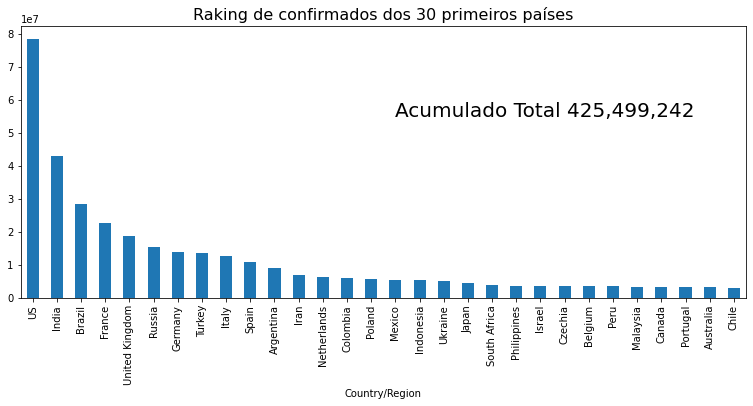

In [76]:
plt.figure(figsize=(13, 5))
plt.title("Raking de confirmados dos 30 primeiros países", fontsize=16)
plt.ylim(0, paises_maior_quantidade_casos_confirmados[0] * 1.05)
plt.annotate(f'Acumulado Total {acumulado_confirmados:,}', xy=(15, paises_maior_quantidade_casos_confirmados[0]*0.7), fontsize=20)
paises_maior_quantidade_casos_confirmados[:30].plot(kind='bar')
plt.show()

### Leitura dos dados do arquivo (time_series_covid19_deaths_global.csv)¶
Casos de mortes globais</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [17]:
df_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_mortes.head()    

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7488,7494,7501,7504,7513,7524,7526,7534,7539,7549
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3407,3410,3414,3420,3423,3430,3432,3433,3438,3445
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6715,6729,6744,6753,6762,6772,6780,6787,6797,6805
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,148,148,149,150,150,150,150,150,150,150
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1898,1898,1898,1899,1899,1899,1899,1899,1899,1899


### Leitura dos dados do arquivo (time_series_covid19_recovered_global.csv)¶
Casos recuperados globais</br>
Leitura feita a partir da internet, para manter o notebook sempre atualizado

In [18]:
df_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recuperados.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sumarização dos novos dados por país

In [19]:
df_mortes_by_country = df_mortes[2:].groupby('Country/Region')[col_datas].sum()
df_mortes_by_country.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Palau,0,0,0,0,0,0,0,0,0,0,...,1,1,4,4,4,5,5,5,5,6
United Arab Emirates,0,0,0,0,0,0,0,0,0,0,...,2284,2285,2287,2288,2289,2290,2292,2293,2294,2296
Trinidad and Tobago,0,0,0,0,0,0,0,0,0,0,...,3519,3526,3531,3535,3535,3549,3553,3562,3567,3574
Oman,0,0,0,0,0,0,0,0,0,0,...,4195,4208,4211,4216,4221,4225,4225,4225,4231,4234
Bosnia and Herzegovina,0,0,0,0,0,0,0,0,0,0,...,14984,14984,15096,15127,15162,15232,15263,15263,15263,15327


In [20]:
df_recuperados_by_country = df_recuperados[2:].groupby('Country/Region')[col_datas].sum()
df_recuperados_by_country.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Ghana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seychelles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New Zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualizando crescimento dos casos de mortes e de recuperados no Brasil 

In [77]:
acumulado_mortes = df_mortes_by_country.loc["Brazil"][-1]

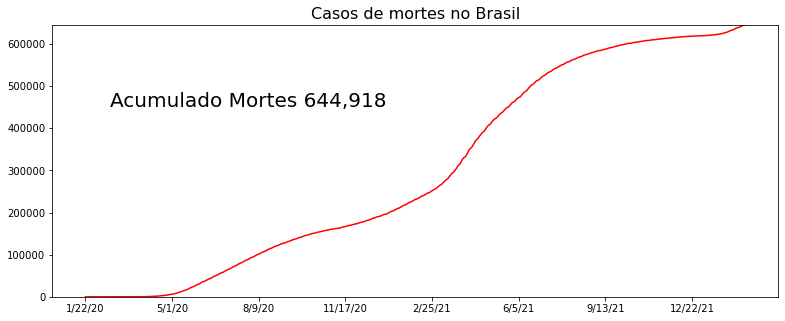

In [88]:
plt.figure(figsize=(13, 5))
plt.title("Casos de mortes no Brasil", fontsize=16)
plt.annotate(f'Acumulado Mortes {acumulado_mortes:,}', xy=(28, acumulado_mortes*0.7), fontsize=20)
df_mortes_by_country.loc['Brazil'].plot(color='red')
plt.ylim(0, df_mortes_by_country.loc['Brazil'][-1])
plt.show()

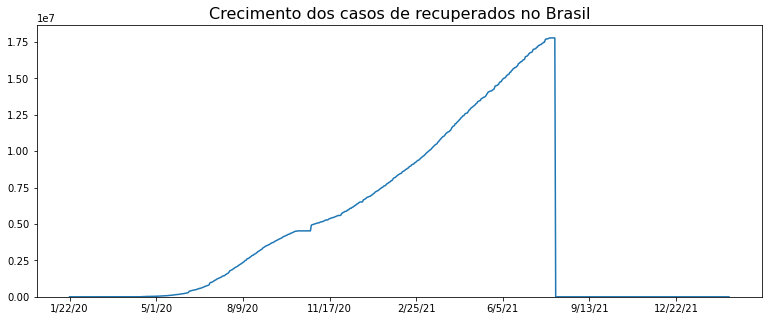

In [23]:
plt.figure(figsize=(13, 5))
plt.title("Crecimento dos casos de recuperados no Brasil", fontsize=16)
df_recuperados_by_country.loc['Brazil'].plot()
plt.ylim(0, max(df_recuperados_by_country.loc['Brazil']) * 1.05)
plt.show()

* <font color='red'>Observamos que totais de recuperados não são mais reportados.</font>

### Concatenando informações do último dia

In [24]:
print(f'Data do último dia disponibilizadob - {col_datas[-1]}')

Data do último dia disponibilizadob - 2/21/22


In [25]:
df_ultimo_dia = pd.concat(
    [
        df_confirmados_by_country[col_datas[-1]],
        df_recuperados_by_country[col_datas[-1]],
        df_mortes_by_country[col_datas[-1]]
    ],
    axis='columns'
)

df_ultimo_dia.columns = ['Confirmados', 'Recuperados', 'Mortes']

df_ultimo_dia.sample(5)

,Confirmados,Recuperados,Mortes
Country/Region,,,
Lesotho,32434,0,696
Thailand,2749561,0,22691
Peru,3497896,0,209641
Germany,13805197,0,121607
Laos,141301,0,612


### Calculando letalidade da Covid-19

In [26]:
percentual_letalidade = df_ultimo_dia.Mortes.sum() / df_ultimo_dia.Confirmados.sum()

print(f'A letalidade da covid-19 no mundo é de {(percentual_letalidade * 100):.3f}%')

A letalidade da covid-19 no mundo é de 1.382%


In [27]:
df_ultimo_dia['Letalidade %'] = (df_ultimo_dia.Mortes / df_ultimo_dia.Confirmados) * 100

df_ultimo_dia.sample(5)

,Confirmados,Recuperados,Mortes,Letalidade %
Country/Region,,,,
Congo (Kinshasa),85876,0,1335,1.554567
Iraq,2293244,0,24876,1.084752
Belgium,3512212,0,30015,0.854590
Cambodia,126977,0,3020,2.378383
Fiji,63650,0,826,1.297722


In [28]:
print('Letalidade no Brasil')
pd.DataFrame(df_ultimo_dia.loc['Brazil']).T

Letalidade no Brasil


,Confirmados,Recuperados,Mortes,Letalidade %
Brazil,28258458.0,0.0,644918.0,2.282212


### Raking de letalidade da Covid-19

In [29]:
paises_maior_letalidade = df_ultimo_dia['Letalidade %'].sort_values(ascending=False)

for ind, pais in enumerate(paises_maior_letalidade.index):
    if pais == 'Brazil':
        print(f'{pais} na posição {ind+1}')

Brazil na posição 43


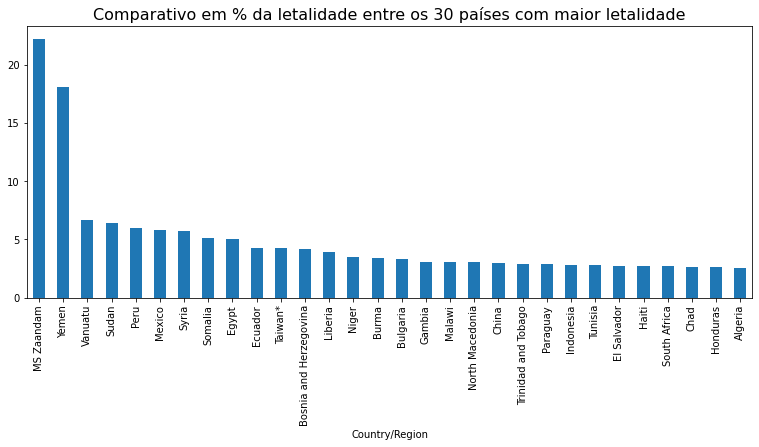

In [35]:
plt.figure(figsize=(13, 5))
plt.title("Comparativo em % da letalidade entre os 30 países com maior letalidade", fontsize=16)
plt.ylim(0, paises_maior_letalidade[0] * 1.05)
paises_maior_letalidade[:30].plot(kind='bar')
plt.show()

In [31]:
df_ultimo_dia.loc[paises_maior_letalidade.index[:10]]

,Confirmados,Recuperados,Mortes,Letalidade %
Country/Region,,,,
MS Zaandam,9,0,2,22.222222
Yemen,11741,0,2123,18.081935
Vanuatu,15,0,1,6.666667
Sudan,61223,0,3892,6.357088
Peru,3497896,0,209641,5.993346
Mexico,5413425,0,315688,5.831576
Syria,53784,0,3053,5.676409
Somalia,26313,0,1348,5.122943
Egypt,471460,0,23806,5.049421


### Visualizando se existe relação entre Confirmados e Mortes

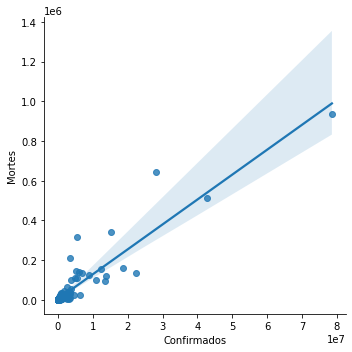

In [32]:
sns.lmplot(data=df_ultimo_dia, x='Confirmados', y='Mortes')

### rugplot - assemelha ao distplot demonstrando onde há maior a concentraçao

<AxesSubplot:xlabel='Letalidade %', ylabel='Density'>

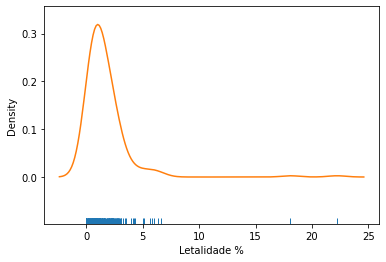

In [33]:
sns.rugplot(df_ultimo_dia['Letalidade %'])
sns.kdeplot(df_ultimo_dia['Letalidade %']) # Confirmando a maior concentração

<AxesSubplot:xlabel='Letalidade %', ylabel='Count'>

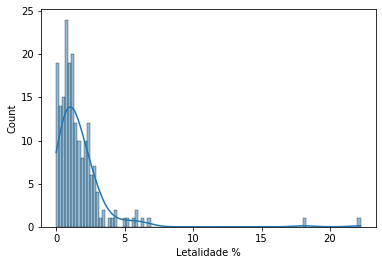

In [34]:
sns.histplot(df_ultimo_dia['Letalidade %'], bins=100, kde=True)